In [1]:
import pandas as pd
import numpy as np
from linearmodels import OLS

In [2]:
df=pd.read_csv("/Users/Bernardo/Downloads/swarmsBEES2.csv")

In [3]:
df=df[~pd.isna(df["Size"])]

In [4]:
df["constant"]=1

In [5]:
df["Large"]=[int(k.strip()=="Large") for k in df["Size"]]
df["No swarm"]=[int(k=="No swarm") for k in df["Size"]]
df["Fight"]=[int(k=="YES") for k in df["F"]]
df["Diversity"]=df["No. of fam"]/df["No. of males"]


The probability of attracting a visible aggregation (bait colony name of the variable Y si hubo, N no hubo)  now not related to month (Pearson correlation; p>0.05), number of sunny days post-split (p>0.05), or number days between splitting and unplugging the colony (p>0.05); nor did it correlate to whether the colony now split in situ or relocated post-split (p>0.05); Supplementary material, Table SX. Checar esto con documento que te envie que en supp material sheet 2

In [6]:
df.columns

Index(['Set', 'Site No.', 'Bait colony', 'Location', 'Longitude', 'Latitude',
       'Split day', 'Set Up date', 'Sample date', 'Month sample',
       'Confirmation of VQ', 'Requeened succesfully', 'GSE ', 'Temp ',
       'Max Temp', 'Size', 'Duration ', 'Split location', 'F', 'No. of fam',
       'No. of males', 'constant', 'Large', 'No swarm', 'Fight', 'Diversity'],
      dtype='object')

In [7]:
import time

In [8]:
def trytodate(k):
    try: return time.strptime(str(k), "%m/%d/%y")
    except: return np.nan
    
def get_time_bet(i,j):
    try: return i.tm_year*365.25+i.tm_yday-(j.tm_year*365.25+j.tm_yday)
    except: return np.nan
    
df["splitdate"]=[trytodate(k) for k in df["Split day"]]
df["setupdate"]=[trytodate(k) for k in df["Set Up date"]]
df["sampledate"]=[trytodate(k) for k in df["Sample date"]]


df["days_between"]=[get_time_bet(i,j) for i,j in zip(df["setupdate"], df["splitdate"])]


df["days_to_form"]=[get_time_bet(i,j) for i,j in zip(df["sampledate"], df["setupdate"])]


(array([4., 4., 4., 3., 3., 0., 0., 0., 0., 3.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

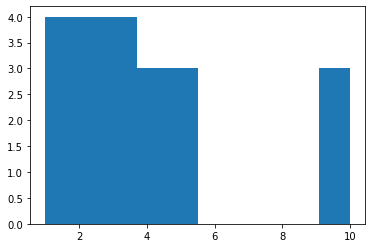

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df["days_to_form"], bins=10)

In [10]:
np.mean(df["days_to_form"])

3.857142857142857

In [11]:
np.std(df["days_to_form"])

2.8163758252611895

In [12]:
df["Split day"]=[str(i)[:str(i).find("/")] for i in df["Sample date"]]

In [13]:
df["month"]=[str(i)[:str(i).find("/")] for i in df["Sample date"]]

In [14]:
df[["Large"]].join(pd.get_dummies(df["month"], drop_first=True))

,Large,11,12,2,3,9,na
0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0
4,1,0,0,1,0,0,0
5,1,1,0,0,0,0,0
6,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,1,1,0,0,0,0,0
9,1,1,0,0,0,0,0


In [15]:
df["month"].value_counts()

11    14
na    10
10     7
2      4
9      3
12     2
3      1
Name: month, dtype: int64

In [16]:
%run /Users/Bernardo/Dropbox/libreriaBGBB.py

<Figure size 432x288 with 0 Axes>

In [17]:
from IPython.display import display, Markdown


In [22]:
from  statsmodels.api import Logit

In [34]:
from statsmodels.discrete.discrete_model import Logit as Logit2

In [38]:
df_aux.drop(["setupdate", "sampledate"], axis=1).to_csv("forstatatrash.csv")

In [35]:
df_aux=df[df.month!="3"]
listaregs=[]

r=Logit2(df_aux["Large"], df_aux[["constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit()
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS", logit=True)
print(r.summary())

#df_aux=df[df.month!="3"]
#df_aux=df_aux[df_aux.month!="12"]
#df_aux=df[df.month!="2"]
r=Logit2(df_aux["No swarm"], df_aux[[]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit()
listaregs=savereg(listaregs,r, depvar="No swarm", name="OLS", logit=True)

print(r.summary())

#print(OLS(df_aux["Diversity"], df_aux[["constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
printregs(listaregs)


         Current function value: 0.419794
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Large   No. Observations:                   40
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Feb 2021   Pseudo R-squ.:                  0.3933
Time:                        22:33:43   Log-Likelihood:                -16.792
converged:                      False   LL-Null:                       -27.676
Covariance Type:            nonrobust   LLR p-value:                 0.0005795
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.2877      0.764      0.377      0.706      -1.209       1.785
month_11       0.6286      0.966      0.651      0.515      -1.26

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


|.|OLS|OLS|
|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>No swarm|
|constant|0.288|-|
|SE|(0.764)|-|
|month_11|0.629|-27.0|
|SE|(0.966)|(196482)|
|month_12|-0.288|-22.2|
|SE|(1.607)|(46799)|
|month_2|-1.39|-44.2|
|SE|(1.384)|(2013196411)|
|month_9|22.65|-23.0|
|SE|(55322)|(57609)|
|month_na|-21.1|20.8|
|SE|(10439)|(10399)|
|---|---|---|
|<b> rsq|0.393|0.784|
|<b> N|40|40|

In [18]:
list(set(df["month"]))

['3', '9', '12', '10', '11', '2']

In [81]:
nm=[]
nl=[]
for maand in [9, 10, 11, 12, 2, 3]:
    nl.append(df[df.month==str(maand)]["Large"].mean())
nm.append(nl)

nl=[]
for maand in [9, 10, 11, 12, 2, 3]:
    nl.append(1-df[df.month==str(maand)]["No swarm"].mean())
nm.append(nl)


In [82]:
import seaborn as sns

Text(0.5, 15.0, 'month')

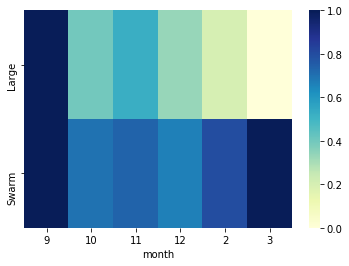

In [90]:
sns.heatmap(nm, xticklabels=[9, 10, 11, 12, 2, 3], yticklabels=["Large", "Swarm"], cmap="YlGnBu")
plt.ylim([2, 0])
plt.xlabel("month")

In [86]:
df["spring"]=[int(i in ["9","10"]) for i in df["month"]]
np.corrcoef(df[~pd.isna(df["month"])]["spring"], df[~pd.isna(df["month"])]["Large"])

array([[1.        , 0.10254657],
       [0.10254657, 1.        ]])

In [89]:
df["spring"]=[int(i in ["9", "10"]) for i in df["month"]]
np.corrcoef(df["spring"], df["No swarm"])

array([[ 1.       , -0.0208385],
       [-0.0208385,  1.       ]])

In [76]:
df[df.month=="10"]["No swarm"].mean()

0.3

In [77]:
df[df.month=="11"]["No swarm"].mean()

0.2631578947368421

In [79]:
df[df.month=="9"]["No swarm"].mean()

0    0
1    0
2    0
Name: No swarm, dtype: int64

Large swarm: September now a very good month. Those which also had empty dates were also a bad month.

In [20]:
df_aux=df[df.month!="3"]

listaregs=[]
r=(OLS(df["Large"], df[["constant", "days_between"]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["No swarm"], df[["constant", "days_between"]]).fit())
listaregs=savereg(listaregs,r, depvar="No swarm", name="OLS")

r=(OLS(df["Fight"], df[["constant", "days_between"]]).fit())
listaregs=savereg(listaregs,r, depvar="Fight", name="OLS")

r=(OLS(df["Diversity"], df[["constant", "days_between"]]).fit())
listaregs=savereg(listaregs,r, depvar="Diversity", name="OLS")

printregs(listaregs)


/Users/Bernardo/miniconda3/lib/python3.7/site-packages/linearmodels/utility.py:478: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


|.|OLS|OLS|OLS|OLS|
|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>No swarm|<b>Fight|<b>Diversity|
|constant|0.005|0.349**|0.236**|0.508***|
|SE|(0.103)|(0.152)|(0.118)|(0.074)|
|days_between|-0.002|-0.004|-0.016|-0.007|
|SE|(0.029)|(0.029)|(0.018)|(0.017)|
|11|0.437***|-|-|-|
|SE|(0.124)|-|-|-|
|12|0.004|-|-|-|
|SE|(0.069)|-|-|-|
|2|0.009|-|-|-|
|SE|(0.169)|-|-|-|
|9|0.996***|-|-|-|
|SE|(0.074)|-|-|-|
|---|---|---|---|---|
|<b> rsq|0.366|0.001|0.017|0.011|
|<b> N|29|30|30|20|

More days between split and set up reduced change of large swam significantly.

In [21]:
np.corrcoef((df["month"]=="9"), (df["Split location"]=="P"))

array([[1.        , 0.08683135],
       [0.08683135, 1.        ]])

In [22]:
listaregs=[]
r=(OLS(df["Large"], df[["constant"]].join(pd.get_dummies(df["Split location"], drop_first=True)).join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["No swarm"], df[["constant"]].join(pd.get_dummies(df["Split location"], drop_first=True)).join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="No swarm", name="OLS")

r=(OLS(df["Fight"], df[["constant"]].join(pd.get_dummies(df["Split location"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Fight", name="OLS")

r=(OLS(df["Diversity"], df[["constant"]].join(pd.get_dummies(df["Split location"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Diversity", name="OLS")

printregs(listaregs)


|.|OLS|OLS|OLS|OLS|
|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>No swarm|<b>Fight|<b>Diversity|
|constant|0.196|0.539**|0.2**|0.49***|
|SE|(0.146)|(0.167)|(0.089)|(0.067)|
|P|0.291**|-0.342**|-0.057|0.005|
|SE|(0.138)|(0.132)|(0.118)|(0.078)|
|11|0.192|-0.114|-|-|
|SE|(0.172)|(0.149)|-|-|
|12|0.04|-0.092|-|-|
|SE|(0.241)|(0.271)|-|-|
|2|-0.113|-0.203|-|-|
|SE|(0.247)|(0.281)|-|-|
|9|0.61***|-0.311**|-|-|
|SE|(0.157)|(0.157)|-|-|
|---|---|---|---|---|
|<b> rsq|0.217|0.179|0.006|0.0|
|<b> N|40|40|41|31|

P increased chance of large swarm, as well as decreased chance of no swarm. 

In [23]:
listaregs=[]

r=(OLS(df["Large"], df[["constant", "Temp "]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")


r=(OLS(df["No swarm"], df[["constant", "Temp "]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="No swarm", name="OLS")

r=(OLS(df["Fight"], df[["constant", "Temp "]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Fight", name="OLS")


r=(OLS(df["Diversity"], df[["constant", "Temp "]]).fit())
listaregs=savereg(listaregs,r, depvar="Diversity", name="OLS")
printregs(listaregs)


|.|OLS|OLS|OLS|OLS|
|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>No swarm|<b>Fight|<b>Diversity|
|constant|-1.51**|-0.195|-0.852|0.325|
|SE|(0.695)|(0.202)|(0.717)|(0.422)|
|Temp |0.09**|0.008|0.043|0.007|
|SE|(0.03)|(0.009)|(0.033)|(0.016)|
|11|0.015|-0.012|0.082|-|
|SE|(0.24)|(0.015)|(0.175)|-|
|12|-0.493|-0.04|-0.345|-|
|SE|(0.328)|(0.044)|(0.235)|-|
|2|-0.859**|0.154|-0.176|-|
|SE|(0.279)|(0.149)|(0.255)|-|
|9|0.165|-0.025|0.064|-|
|SE|(0.237)|(0.027)|(0.348)|-|
|---|---|---|---|---|
|<b> rsq|0.362|0.184|0.094|0.009|
|<b> N|31|31|31|31|

In [24]:
listaregs=[]
r=(OLS(df["Large"], df[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["No swarm"], df[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="No swarm", name="OLS")

r=(OLS(df[["Fight"]], df[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True))).fit())
listaregs=savereg(listaregs,r, depvar="Fight", name="OLS")

r=(OLS(df["Diversity"], df[["GSE ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Diversity", name="OLS")

printregs(listaregs)


|.|OLS|OLS|OLS|OLS|
|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>No swarm|<b>Fight|<b>Diversity|
|GSE |0.028**|-0.004|0.009|-0.011|
|SE|(0.012)|(0.004)|(0.012)|(0.008)|
|constant|-0.022|0.094|-0.055|0.736***|
|SE|(0.306)|(0.096)|(0.26)|(0.188)|
|11|0.137|-0.003|0.093|-|
|SE|(0.214)|(0.009)|(0.174)|-|
|12|-0.251|0.028|-0.203|-|
|SE|(0.339)|(0.031)|(0.163)|-|
|2|-0.389|0.203|0.051|-|
|SE|(0.26)|(0.178)|(0.224)|-|
|9|0.426**|0.0|0.19|-|
|SE|(0.177)|(0.004)|(0.299)|-|
|---|---|---|---|---|
|<b> rsq|0.281|0.188|0.049|0.092|
|<b> N|30|30|30|30|

In [25]:
listaregs=[]
df["In situ"]=df["Split location"]=="P"

r=(OLS(df["Large"], df[["constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["Temp ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["In situ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["days_between", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

printregs(listaregs)

listaregs=[]
df["In situ"]=df["Split location"]=="P"
r=(OLS(df["Large"], df[["GSE ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["Temp ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["In situ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

r=(OLS(df["Large"], df[["days_between", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="OLS")

printregs(listaregs)


|.|OLS|OLS|OLS|OLS|OLS|
|---|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>Large swarm|<b>Large swarm|<b>Large swarm|<b>Large swarm|
|constant|0.4**|-0.022|-1.51**|0.196|0.005|
|SE|(0.155)|(0.306)|(0.695)|(0.146)|(0.103)|
|month_11|0.126|0.137|0.015|0.192|0.437***|
|SE|(0.193)|(0.214)|(0.24)|(0.172)|(0.124)|
|month_12|-0.067|-0.251|-0.493|0.04|0.004|
|SE|(0.313)|(0.339)|(0.328)|(0.241)|(0.069)|
|month_2|-0.2|-0.389|-0.859**|-0.113|0.009|
|SE|(0.237)|(0.26)|(0.279)|(0.247)|(0.169)|
|month_9|0.6***|0.426**|0.165|0.61***|0.996***|
|SE|(0.155)|(0.177)|(0.237)|(0.157)|(0.074)|
|GSE |-|0.028**|-|-|-|
|SE|-|(0.012)|-|-|-|
|Temp |-|-|0.09**|-|-|
|SE|-|-|(0.03)|-|-|
|In situ|-|-|-|0.291**|-|
|SE|-|-|-|(0.138)|-|
|days_between|-|-|-|-|-0.002|
|SE|-|-|-|-|(0.029)|
|---|---|---|---|---|---|
|<b> rsq|0.137|0.281|0.362|0.217|0.366|
|<b> N|40|30|31|40|29|

|.|OLS|OLS|OLS|OLS|
|---|---|---|---|---|
|<b>Dependent variable|<b>Large swarm|<b>Large swarm|<b>Large swarm|<b>Large swarm|
|GSE |0.019|-|-|-|
|SE|(0.013)|-|-|-|
|constant|0.159|0.111|0.3**|0.51***|
|SE|(0.293)|(0.739)|(0.102)|(0.144)|
|Temp |-|0.019|-|-|
|SE|-|(0.029)|-|-|
|In situ|-|-|0.319**|-|
|SE|-|-|(0.147)|-|
|days_between|-|-|-|-0.049**|
|SE|-|-|-|(0.02)|
|---|---|---|---|---|
|<b> rsq|0.044|0.012|0.102|0.106|
|<b> N|31|32|41|30|

In [26]:
from statsmodels.discrete.discrete_model import Logit

In [63]:
def logit2(endog, exog):
    colis=list(exog.columns)
    df=exog
    df[endog.name]=endog
    #print(df)
    df=df.dropna(axis=0)
    print(df)
    return Logit(df[endog.name], df[colis])

In [64]:
listaregs=[]
df["In situ"]=df["Split location"]=="P"

dfaux=df[~pd.isna(df["Large"])]
dfaux=df[dfaux.month!="3"]

df_aux=dfaux[dfaux.month!="3"]

r=(logit2(dfaux["Large"],dfaux[["constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(dfaux["Large"], dfaux[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["Temp ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["In situ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["days_between", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

printregs(listaregs)

listaregs=[]
df["In situ"]=df["Split location"]=="P"
r=(logit2(df["Large"], df[["GSE ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["Temp ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["In situ", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

r=(logit2(df["Large"], df[["days_between", "constant"]]).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)

printregs(listaregs)


    constant  month_11  month_12  month_2  month_9  Large
0          1         0         0        0        1      1
1          1         0         0        0        1      1
2          1         0         0        0        1      1
3          1         1         0        0        0      1
4          1         0         0        1        0      1
5          1         1         0        0        0      1
6          1         1         0        0        0      1
7          1         1         0        0        0      0
8          1         1         0        0        0      1
9          1         1         0        0        0      1
10         1         1         0        0        0      0
11         1         0         1        0        0      0
12         1         0         0        1        0      0
13         1         0         0        1        0      0
14         1         0         0        1        0      0
15         1         0         0        1        0      0
23         1  

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


LinAlgError: Singular matrix

In [67]:

r=(logit2(dfaux["Large"], dfaux[["GSE ", "constant"]].join(pd.get_dummies(df_aux["month"], drop_first=True, prefix="month"))).fit())
listaregs=savereg(listaregs,r, depvar="Large swarm", name="Logit", logit=True)


    GSE   constant  Large
0   20.8         1      1
1   21.3         1      1
2   22.1         1      1
3   27.8         1      1
4   21.2         1      1
6   24.9         1      1
7   24.9         1      0
8   24.5         1      1
9   28.7         1      1
10  24.9         1      0
11  24.0         1      0
12  28.5         1      0
13  18.5         1      0
14  24.7         1      0
15  16.8         1      0
23  31.5         1      1
24  22.0         1      1
25  17.7         1      0
26  26.3         1      1
27  20.9         1      1
28  19.5         1      0
29  15.1         1      0
30  17.7         1      1
31  23.0         1      1
32  14.6         1      1
33  21.6         1      1
34  23.5         1      1
35  15.1         1      1
44   3.1         1      0
46  23.0         1      0
Optimization terminated successfully.
         Current function value: 0.644827
         Iterations 5


/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
np.corrcoef((df["month"]=="na"), (df["Split location"]=="P"))

array([[ 1.        , -0.35473536],
       [-0.35473536,  1.        ]])

In [201]:
df.columns

Index(['Set', 'Site No.', 'Bait colony', 'Location', 'Longitude', 'Latitude',
       'Split day', 'Set Up date', 'Sample date', 'Confirmation of VQ',
       'Requeened succesfully', 'GSE ', 'Temp ', 'Max Temp', 'Size',
       'Duration ', 'Split location', 'F', 'No. of fam', 'No. of males',
       'constant', 'Large', 'No swarm', 'Fight', 'Diversity', 'splitdate',
       'setupdate', 'days_between', 'month', 'sampledate', 'days_to_form'],
      dtype='object')

(array([7., 6., 6., 6., 2., 1., 0., 0., 1., 2.]),
 array([  3. ,  56.1, 109.2, 162.3, 215.4, 268.5, 321.6, 374.7, 427.8,
        480.9, 534. ]),
 <a list of 10 Patch objects>)

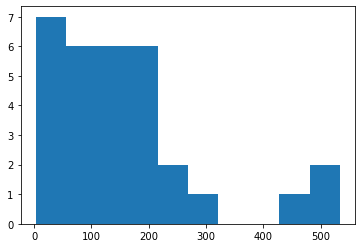

In [202]:
plt.hist(df["No. of males"])

(array([1., 3., 2., 1., 5., 0., 0., 0., 0., 1.]),
 array([0.2254902 , 0.29039216, 0.35529412, 0.42019608, 0.48509804,
        0.55      , 0.61490196, 0.67980392, 0.74470588, 0.80960784,
        0.8745098 ]),
 <a list of 10 Patch objects>)

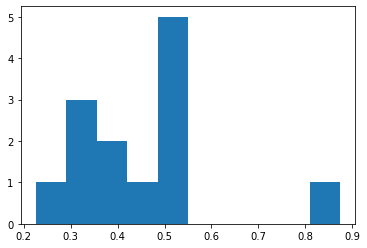

In [203]:
plt.hist(df[df["No. of males"]>150]["Diversity"], bins=10)

In [213]:
df.columns

Index(['Set', 'Site No.', 'Bait colony', 'Location', 'Longitude', 'Latitude',
       'Split day', 'Set Up date', 'Sample date', 'Confirmation of VQ',
       'Requeened succesfully', 'GSE ', 'Temp ', 'Max Temp', 'Size',
       'Duration ', 'Split location', 'F', 'No. of fam', 'No. of males',
       'constant', 'Large', 'No swarm', 'Fight', 'Diversity', 'splitdate',
       'setupdate', 'days_between', 'month', 'sampledate', 'days_to_form'],
      dtype='object')

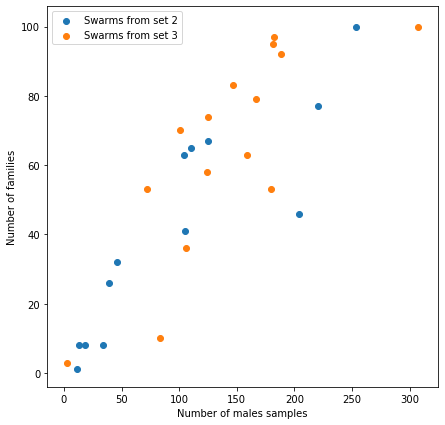

In [222]:
fig=plt.figure(figsize=(7,7))
for seti in list(set(df["Set"])):
    dfset=df[df["Set"]==seti]
    if seti!=1:
        plt.scatter(dfset["No. of males"], dfset["No. of fam"], label="Swarms from set "+str(seti))
plt.legend()
plt.ylabel("Number of families")
plt.xlabel("Number of males samples")
fig.savefig("graph_swarms.pdf")
plt.show()

In [223]:
np.mean(df["Diversity"])

0.49285165776468315

In [225]:
np.std(df["Diversity"])

0.1978050149843988

In [226]:
np.mean(df["No. of fam"])

79.51612903225806

In [227]:
np.std(df["No. of fam"])

88.47156312505054

In [69]:
import sys 
print(sys.version) 

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
